In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [32]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [33]:
df.drop(['loan_id'],axis =1,inplace=True)

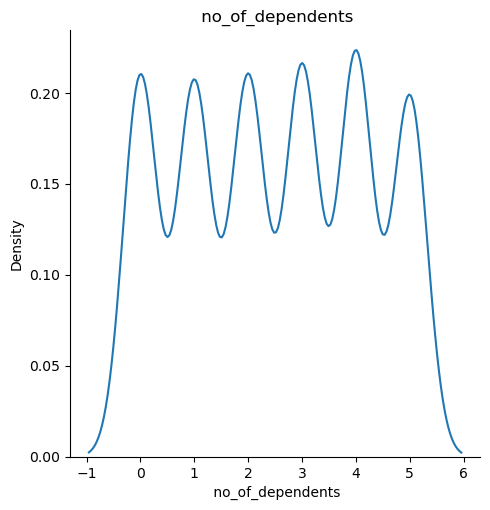

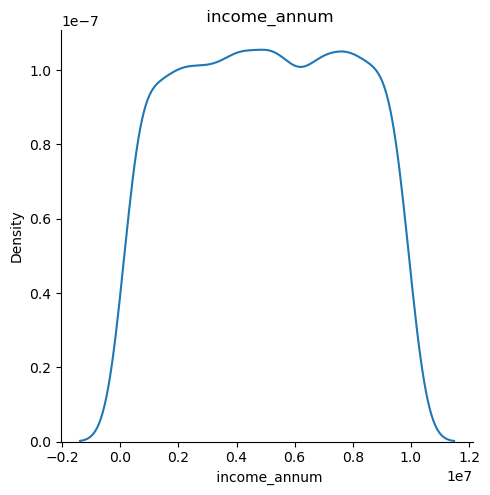

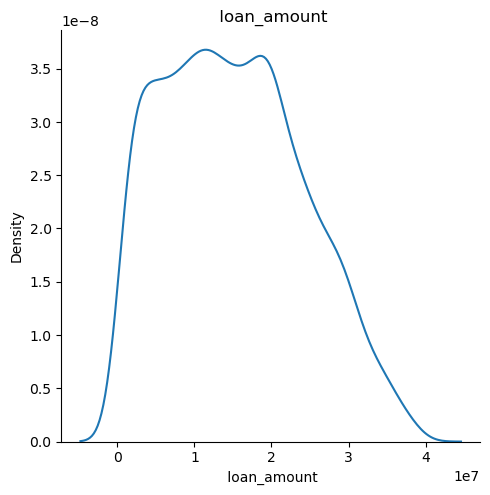

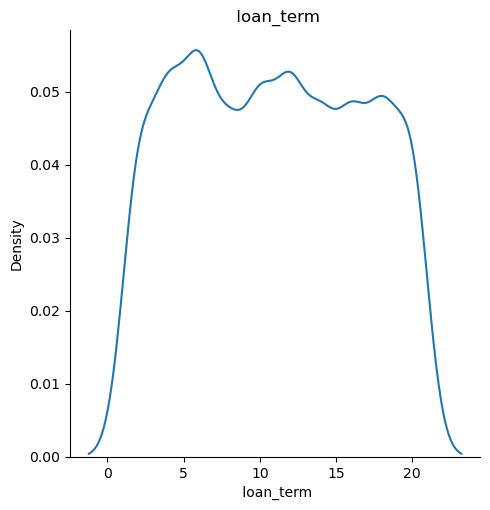

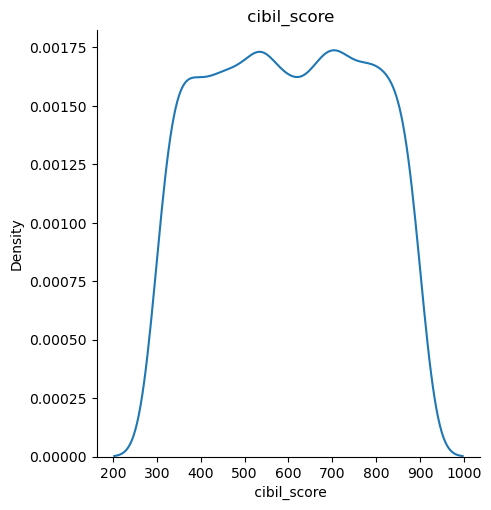

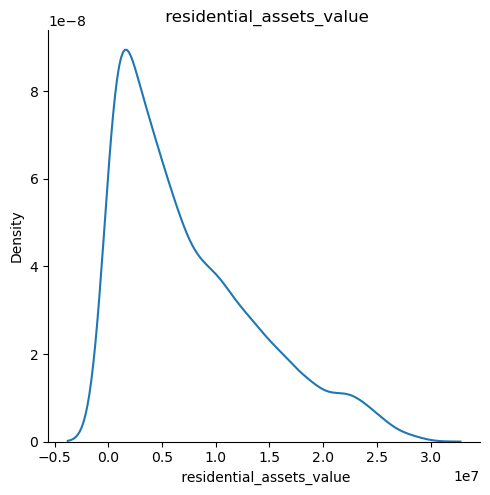

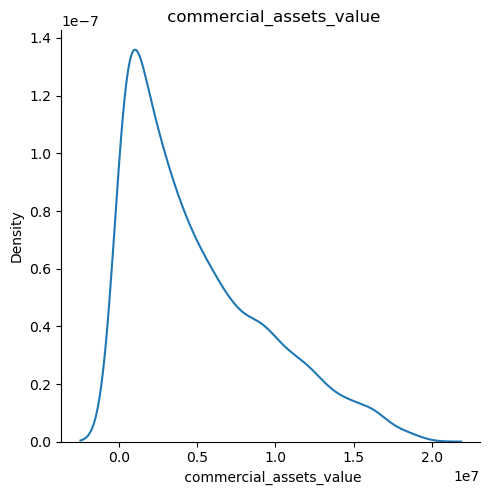

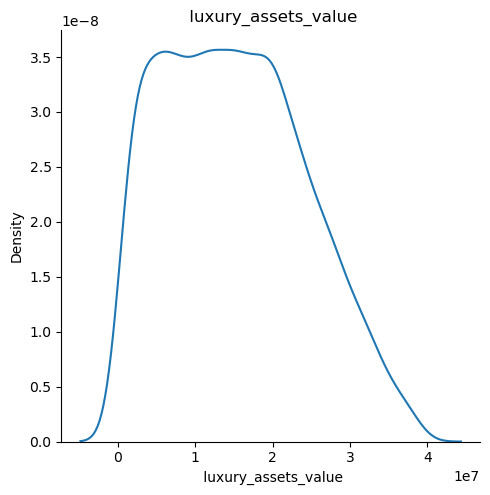

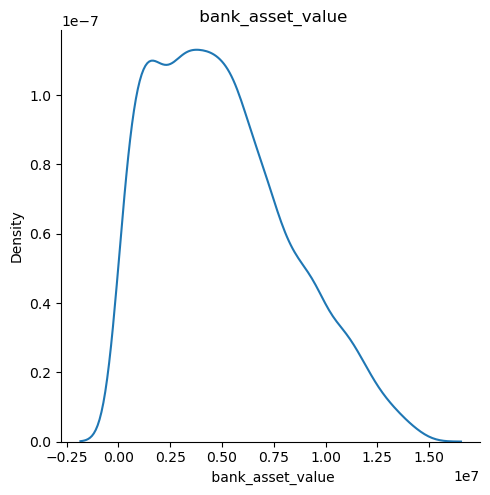

In [34]:
num_feat = df.select_dtypes([int,float])
for i in num_feat:
    sns.displot(data = df,x = i,kind='kde')
    plt.title(i)
    plt.show()

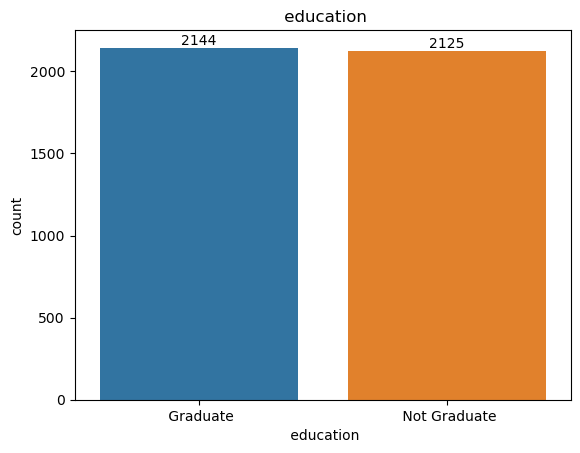

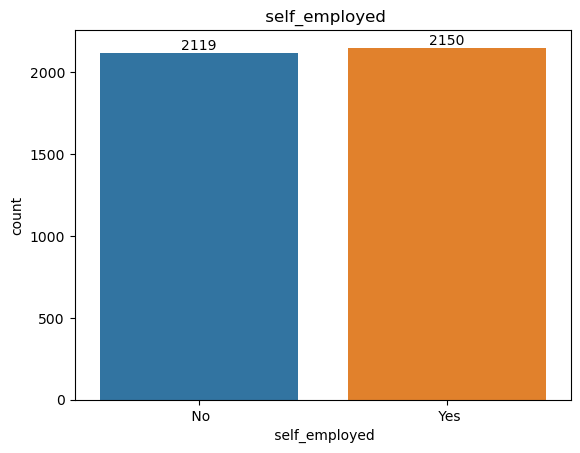

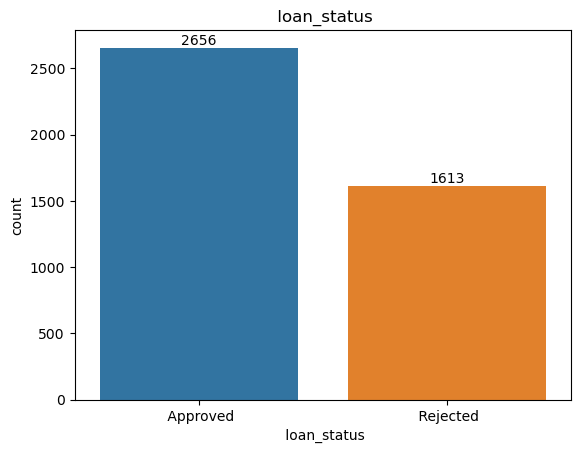

In [35]:
cat = df.select_dtypes('object')
for counts in cat:
    ax=sns.countplot(data=df,x=counts)
    for label in ax.containers:
        ax.bar_label(label)
        plt.title(counts)
        plt.show()

In [36]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for l in df:
    df[l] =le.fit_transform(df[l])

In [38]:
le.classes_

array([' Approved', ' Rejected'], dtype=object)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0    no_of_dependents          4269 non-null   int64
 1    education                 4269 non-null   int32
 2    self_employed             4269 non-null   int32
 3    income_annum              4269 non-null   int64
 4    loan_amount               4269 non-null   int64
 5    loan_term                 4269 non-null   int64
 6    cibil_score               4269 non-null   int64
 7    residential_assets_value  4269 non-null   int64
 8    commercial_assets_value   4269 non-null   int64
 9    luxury_assets_value       4269 non-null   int64
 10   bank_asset_value          4269 non-null   int64
 11   loan_status               4269 non-null   int32
dtypes: int32(3), int64(9)
memory usage: 350.3 KB


In [42]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [41]:
X = df.drop([' loan_status'],axis=1)
y=df[' loan_status']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=12)

In [52]:
X_test

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
2770,3,0,1,71,213,9,257,20,38,261,93
3071,3,0,0,92,200,4,349,197,67,357,100
2451,5,1,0,30,71,0,538,23,29,99,36
404,3,0,0,3,7,9,201,9,8,6,2
3501,1,0,1,74,236,5,392,6,122,267,50
...,...,...,...,...,...,...,...,...,...,...,...
3212,2,0,0,49,162,5,545,122,90,111,57
324,2,1,0,55,161,5,408,38,8,147,44
1039,5,1,0,4,20,1,47,1,0,16,2
3813,5,0,0,34,125,1,20,26,29,123,29


In [55]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [83]:
model = XGBClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('confusion matrix :\n',confusion_matrix(y_test,pred))
print('Calssification report :\n',classification_report(y_test,pred))

confusion matrix :
 [[786  11]
 [ 15 469]]
Calssification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       797
           1       0.98      0.97      0.97       484

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



In [61]:
print('test accuracy :',round(accuracy_score(y_test,pred),2)*100,'%')
print('train accuracy :',accuracy_score(y_train,model.predict(X_train))*100,'%')

test accuracy : 98.0 %
train accuracy : 100.0 %


<Axes: >

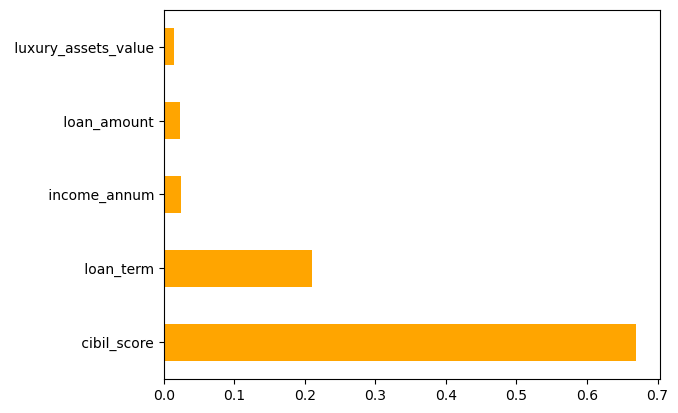

In [68]:
features = pd.Series(model.feature_importances_,index=X.columns)
features.nlargest(5).plot.barh(color='orange')

In [70]:
features.sort_values(ascending=False)

 cibil_score                 0.669525
 loan_term                   0.210645
 income_annum                0.024568
 loan_amount                 0.023518
 luxury_assets_value         0.014406
 bank_asset_value            0.012926
 commercial_assets_value     0.010326
 no_of_dependents            0.009470
 residential_assets_value    0.008948
 self_employed               0.008274
 education                   0.007394
dtype: float32

In [87]:
#!pip install catboost
#!pip install lightgbm

In [90]:
from catboost import CatBoostClassifier
model1 = CatBoostClassifier()
model1.fit(X_train,y_train)
pred = model1.predict(X_test)
print('confusion matrix :\n',confusion_matrix(y_test,pred))
print('Calssification report :\n',classification_report(y_test,pred))

Learning rate set to 0.016441
0:	learn: 0.6583075	total: 6.59ms	remaining: 6.58s
1:	learn: 0.6232782	total: 14ms	remaining: 6.98s
2:	learn: 0.5887539	total: 20.5ms	remaining: 6.83s
3:	learn: 0.5562410	total: 25.8ms	remaining: 6.42s
4:	learn: 0.5230618	total: 31.5ms	remaining: 6.27s
5:	learn: 0.4937278	total: 37.2ms	remaining: 6.17s
6:	learn: 0.4657559	total: 42.1ms	remaining: 5.97s
7:	learn: 0.4444466	total: 47.2ms	remaining: 5.86s
8:	learn: 0.4220337	total: 52.3ms	remaining: 5.76s
9:	learn: 0.3983101	total: 57.1ms	remaining: 5.65s
10:	learn: 0.3790971	total: 61.8ms	remaining: 5.55s
11:	learn: 0.3576377	total: 67.3ms	remaining: 5.54s
12:	learn: 0.3397044	total: 71.6ms	remaining: 5.43s
13:	learn: 0.3255250	total: 76.3ms	remaining: 5.37s
14:	learn: 0.3092507	total: 81.2ms	remaining: 5.33s
15:	learn: 0.2952408	total: 85.9ms	remaining: 5.28s
16:	learn: 0.2832751	total: 91.5ms	remaining: 5.29s
17:	learn: 0.2704493	total: 96.4ms	remaining: 5.26s
18:	learn: 0.2613741	total: 102ms	remaining: 5

<Axes: >

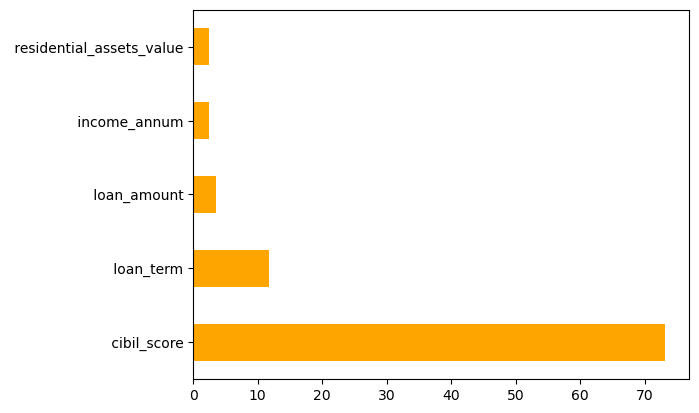

In [91]:
features = pd.Series(model1.feature_importances_,index=X.columns)
features.nlargest(5).plot.barh(color='orange')

In [92]:
from lightgbm import LGBMClassifier
model2 = LGBMClassifier()
model2.fit(X_train,y_train)
pred = model2.predict(X_test)
print('confusion matrix :\n',confusion_matrix(y_test,pred))
print('Calssification report :\n',classification_report(y_test,pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1129, number of negative: 1859
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1432
[LightGBM] [Info] Number of data points in the train set: 2988, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377845 -> initscore=-0.498706
[LightGBM] [Info] Start training from score -0.498706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g